In [1]:
#import libraries
import pandas as pd
import nltk

In [2]:
#import data
messages = pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.shape

(5572, 2)

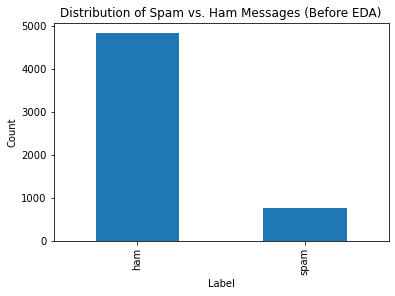

In [29]:
plt.figure(figsize=(6, 4))
messages['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam vs. Ham Messages (Before EDA)')
plt.show()

In [31]:
print(messages.dtypes)

label      object
message    object
dtype: object


In [32]:
# Display the summary statistics of the dataset
summary_stats = messages.describe()
print(summary_stats)

       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


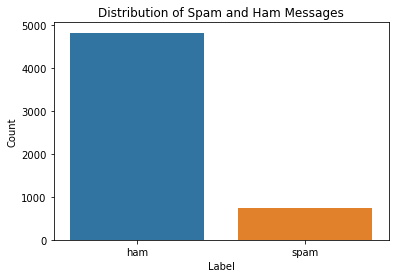

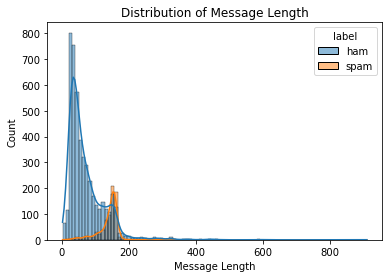

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of spam and ham messages
sns.countplot(data=messages, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

# Plot the length distribution of messages
messages['message_length'] = messages['message'].apply(len)
sns.histplot(data=messages, x='message_length', hue='label', kde=True)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Distribution of Message Length')
plt.show()

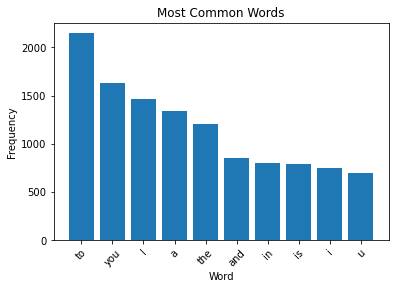

In [34]:
from collections import Counter

# Concatenate all messages into a single string
all_messages = ' '.join(messages['message'])

# Tokenize the string and count word frequencies
word_counts = Counter(all_messages.split())

# Get the most common words and their frequencies
common_words = word_counts.most_common(10)
words, frequencies = zip(*common_words)

# Plot the word frequencies
plt.bar(words, frequencies)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

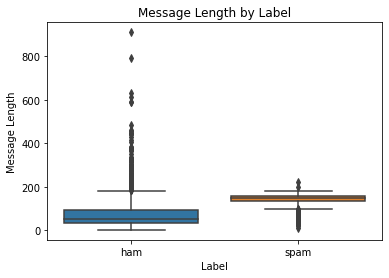

In [35]:
sns.boxplot(data=messages, x='label', y=messages['message'].str.len())
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.title('Message Length by Label')
plt.show()

In [36]:
message_lengths = messages['message'].str.len()
statistics = message_lengths.describe()
print(statistics)


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message, dtype: float64


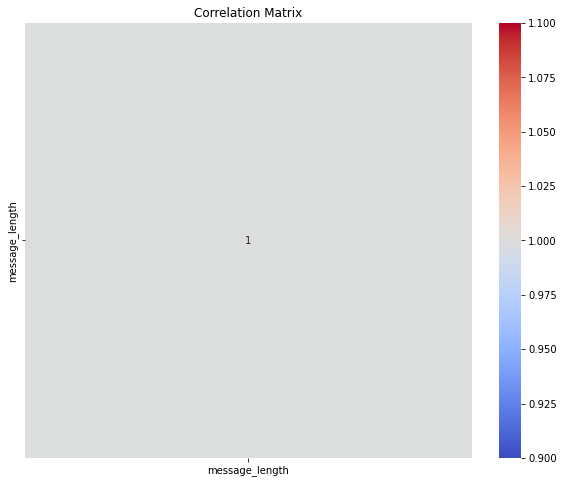

In [37]:
correlation_matrix = messages.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

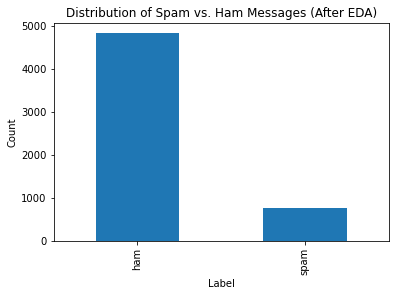

In [39]:
plt.figure(figsize=(6, 4))
messages['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam vs. Ham Messages (After EDA)')
plt.show()


In [9]:
#Data cleaning
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Faiyaj
[nltk_data]     Shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Before Pre-processing
data_shape_before = messages.shape
data_info_before = messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           5572 non-null   object
 1   message         5572 non-null   object
 2   message_length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [11]:
# Data Preprocessing Steps
# Step 1: Handling Missing Values
messages_preprocessed = messages.dropna()

# Step 2: Removing Duplicates
messages_preprocessed = messages_preprocessed.drop_duplicates()

# Step 3: Transforming Variables (example: converting 'label' to numerical)
messages_preprocessed['label'] = messages_preprocessed['label'].map({'spam': 1, 'ham': 0})

# Step 4: Additional Data Preprocessing Steps...


In [12]:
# After Pre-processing
data_shape_after = messages_preprocessed.shape
data_info_after = messages_preprocessed.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           5169 non-null   int64 
 1   message         5169 non-null   object
 2   message_length  5169 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 161.5+ KB


In [13]:
wordnet=WordNetLemmatizer()
ps=PorterStemmer()
corpus=[]

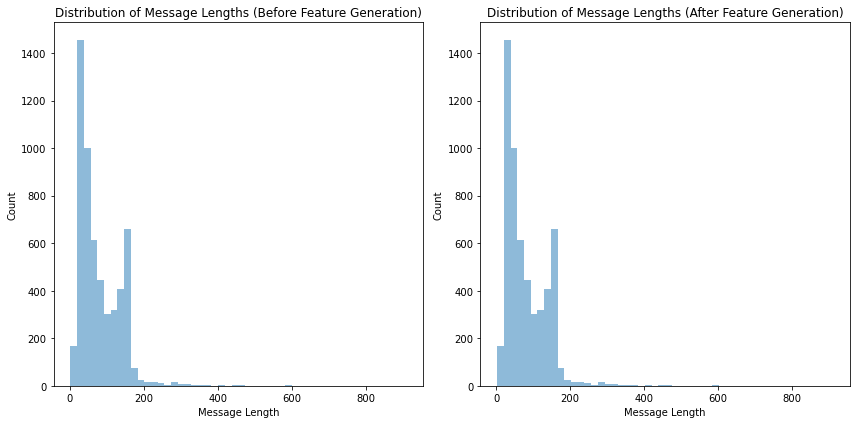

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer

# Rest of your code...


X = messages['message']
y = messages['label']

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)

# Apply feature selection using SelectKBest and chi2
selector = SelectKBest(chi2, k=1000)  # Select top 1000 features
X_selected = selector.fit_transform(X_counts, y)

# Step 4: Feature generation

# Generate a new feature for the length of messages
messages['message_length'] = messages['message'].apply(lambda x: len(x))

# Step 5: Visualize the difference between the data before and after feature selection/generation

# Plot the distribution of message lengths before and after feature generation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(messages['message_length'], bins=50, alpha=0.5)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Distribution of Message Lengths (Before Feature Generation)')

plt.subplot(1, 2, 2)
plt.hist(messages['message_length'], bins=50, alpha=0.5)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Distribution of Message Lengths (After Feature Generation)')

plt.tight_layout()
plt.show()

# ... Additional EDA steps or analysis ...

# Rest of the code...


In [22]:
for i in range(0,len(messages)):
    review=re.sub('^a-zA-Z',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [7]:
corpus

['go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...',
 'ok lar... joke wif u oni...',
 "free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'",
 'u dun say earli hor... u c alreadi say...',
 'nah think goe usf, live around though',
 "freemsg hey darl 3 week' word back! i'd like fun still? tb ok! xxx std chg send, £1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'mell mell (oru minnaminungint nurungu vettam)' set callertun callers. press *9 copi friend callertun",
 'winner!! valu network custom select receivea £900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobil 11 month more? u r entitl updat latest colour mobil camera free! call mobil updat co free 08002986030',
 "i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today.",
 'six chanc win cash! 100 20,000 pound txt> csh11 send 87

In [8]:
#creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
y=pd.get_dummies(messages['label'])
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [11]:
y=y.iloc[:,1].values

In [12]:
#traintest split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [13]:
#training model - Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

In [14]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [15]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [16]:
#model_evaluation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [17]:
cm

array([[949,   6],
       [  8, 152]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [19]:
accuracy

0.9874439461883409